커피매장위치 비교

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

https://drive.google.com/drive/folders/1E2DRq5B9hhlb8wcfsXRrko1nfFa5Txme?usp=sharing

In [ ]:
!unzip -O cp949 '/content/drive/MyDrive/공공데이터/소상공인시장진흥공단_상가(상권)정보_20231231.zip' -d 'data/'

In [30]:
from glob import glob

In [31]:
file_lists = glob("data/*.csv")
file_lists

['data/소상공인시장진흥공단_상가(상권)정보_대구_202312.csv',
 'data/소상공인시장진흥공단_상가(상권)정보_충남_202312.csv',
 'data/소상공인시장진흥공단_상가(상권)정보_전남_202312.csv',
 'data/소상공인시장진흥공단_상가(상권)정보_경남_202312.csv',
 'data/소상공인시장진흥공단_상가(상권)정보_제주_202312.csv',
 'data/소상공인시장진흥공단_상가(상권)정보_충북_202312.csv',
 'data/소상공인시장진흥공단_상가(상권)정보_광주_202312.csv',
 'data/소상공인시장진흥공단_상가(상권)정보_인천_202312.csv',
 'data/소상공인시장진흥공단_상가(상권)정보_전북_202312.csv',
 'data/소상공인시장진흥공단_상가(상권)정보_서울_202312.csv',
 'data/소상공인시장진흥공단_상가(상권)정보_경북_202312.csv',
 'data/소상공인시장진흥공단_상가(상권)정보_부산_202312.csv',
 'data/소상공인시장진흥공단_상가(상권)정보_울산_202312.csv',
 'data/소상공인시장진흥공단_상가(상권)정보_경기_202312.csv',
 'data/소상공인시장진흥공단_상가(상권)정보_세종_202312.csv',
 'data/소상공인시장진흥공단_상가(상권)정보_대전_202312.csv',
 'data/소상공인시장진흥공단_상가(상권)정보_강원_202312.csv']

In [55]:
import pandas as pd
all_df = []
for file in file_lists:
  try:
    all_df.append( pd.read_csv(file,low_memory=False))
  except UnicodeDecodeError:
    all_df.append( pd.read_csv(file,encoding='cp949',low_memory=False))

df = pd.concat(all_df)
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [56]:
df['시도명'].unique()

array(['대구광역시', '충청남도', '전라남도', '경상남도', '제주특별자치도', '충청북도', '광주광역시',
       '인천광역시', '전라북도', '서울특별시', '경상북도', '부산광역시', '울산광역시', '경기도',
       '세종특별자치시', '대전광역시', '강원특별자치도'], dtype=object)

In [57]:
remove_col_names = df.columns[df.columns.str.contains('코드|번호|정보|번지')]
remove_col_names

Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '표준산업분류코드', '시도코드',
       '시군구코드', '행정동코드', '법정동코드', '지번코드', '대지구분코드', '지번본번지', '지번부번지', '도로명코드',
       '건물본번지', '건물부번지', '건물관리번호', '구우편번호', '신우편번호', '동정보', '층정보', '호정보'],
      dtype='object')

In [58]:
df = df.drop(columns=remove_col_names)

In [59]:
df.head(1)

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물명,도로명주소,경도,위도
0,아보카,NaN,음식,일식,일식 회/초밥,일식 음식점업,대구광역시,달서구,도원동,도원동,대지,대구광역시 달서구 도원동 1010,대구광역시 달서구 수밭동길,NaN,대구광역시 달서구 수밭동길 34,128.549749,35.795445


In [60]:
df2 = df.loc[:,:'법정동명']
df2['경도'] = df['경도']
df2['위도'] = df['위도']
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2499482 entries, 0 to 98282
Data columns (total 12 columns):
 #   Column    Dtype  
---  ------    -----  
 0   상호명       object 
 1   지점명       object 
 2   상권업종대분류명  object 
 3   상권업종중분류명  object 
 4   상권업종소분류명  object 
 5   표준산업분류명   object 
 6   시도명       object 
 7   시군구명      object 
 8   행정동명      object 
 9   법정동명      object 
 10  경도        float64
 11  위도        float64
dtypes: float64(2), object(10)
memory usage: 247.9+ MB


In [61]:
# 서울쪽 데이터만 따로 보기
seoul_df = df2[df2['시도명'] == '서울특별시']
seoul_df.head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,경도,위도
0,토끼정,NaN,음식,한식,백반/한정식,한식 일반 음식점업,서울특별시,강서구,가양1동,마곡동,126.833022,37.560053
1,카페숲,NaN,음식,비알코올,카페,커피 전문점,서울특별시,금천구,시흥5동,시흥동,126.909939,37.446689
2,다이앤,NaN,소매,섬유·의복·신발 소매,여성 의류 소매업,여자용 겉옷 소매업,서울특별시,중구,신당동,신당동,127.011381,37.568503
3,숯불에닭,NaN,음식,한식,닭/오리고기 구이/찜,한식 일반 음식점업,서울특별시,양천구,신월7동,신월동,126.834524,37.520990
4,맑은에스테틱,NaN,수리·개인,욕탕·신체관리,마사지/안마,마사지업,서울특별시,광진구,자양4동,자양동,127.066814,37.534047


In [62]:
seoul_df.isnull().sum()

상호명              0
지점명         479974
상권업종대분류명         0
상권업종중분류명         0
상권업종소분류명         0
표준산업분류명         94
시도명              0
시군구명             0
행정동명             0
법정동명             0
경도               0
위도               0
dtype: int64

In [63]:
seoul_df = seoul_df.dropna(axis=1)
seoul_df.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,경도,위도
0,토끼정,음식,한식,백반/한정식,서울특별시,강서구,가양1동,마곡동,126.833022,37.560053
1,카페숲,음식,비알코올,카페,서울특별시,금천구,시흥5동,시흥동,126.909939,37.446689
2,다이앤,소매,섬유·의복·신발 소매,여성 의류 소매업,서울특별시,중구,신당동,신당동,127.011381,37.568503
3,숯불에닭,음식,한식,닭/오리고기 구이/찜,서울특별시,양천구,신월7동,신월동,126.834524,37.520990
4,맑은에스테틱,수리·개인,욕탕·신체관리,마사지/안마,서울특별시,광진구,자양4동,자양동,127.066814,37.534047


In [64]:
seoul_df_copy = seoul_df.copy()
seoul_df_copy['상호명_소문자'] = seoul_df_copy['상호명'].str.lower()

In [ ]:
seoul_df_copy[seoul_df_copy['상호명_소문자'].str.contains('이디야')]

In [76]:
seoul_cafe = seoul_df_copy[seoul_df_copy['상권업종소분류명'] == '카페']
seoul_cafe.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,경도,위도,상호명_소문자
1,카페숲,음식,비알코올,카페,서울특별시,금천구,시흥5동,시흥동,126.909939,37.446689,카페숲
9,매머드커피외대,음식,비알코올,카페,서울특별시,동대문구,이문1동,이문동,127.056962,37.598493,매머드커피외대
16,카페브릿지,음식,비알코올,카페,서울특별시,영등포구,여의동,여의도동,126.929094,37.525184,카페브릿지
48,포트캔커피영등포역남부점,음식,비알코올,카페,서울특별시,영등포구,영등포본동,영등포동,126.905637,37.513859,포트캔커피영등포역남부점
60,키쉬미뇽수유역사점,음식,비알코올,카페,서울특별시,강북구,수유3동,수유동,127.025341,37.637737,키쉬미뇽수유역사점


In [ ]:
seoul_cafe.loc[ seoul_cafe['상호명_소문자'] == '이디야', '상호명_소문자'] = '이디야커피'
temp = pd.DataFrame(seoul_cafe['상호명_소문자'].value_counts()[:10])
temp = temp.reset_index()
temp.columns = ['브랜드명', '매장개수']
temp

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

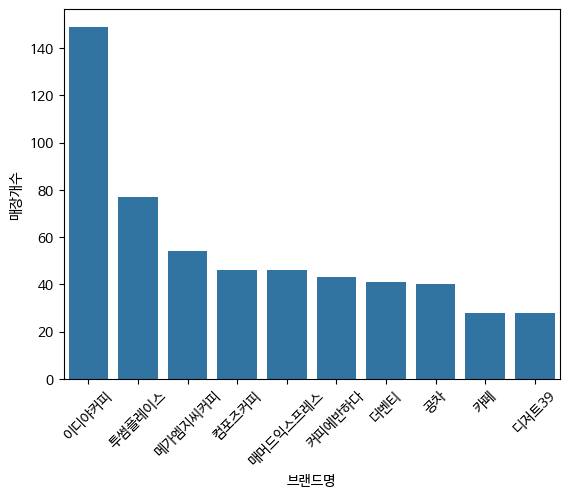

In [102]:
sns.barplot(data=temp, x = '브랜드명',y='매장개수')
plt.xticks(rotation=45)
plt.show()

In [124]:
# '|'.join(temp['브랜드명'].values)
# seoul_cafe[seoul_cafe['상호명'].str.contains('|'.join(temp['브랜드명'].values))]
# temp['브랜드명']
seoul_cafe_10 = seoul_cafe[seoul_cafe['상호명'].apply(lambda x : x in  temp['브랜드명'].values)]
# '이디야' in temp['브랜드명'].values

<Axes: xlabel='시군구명', ylabel='count'>

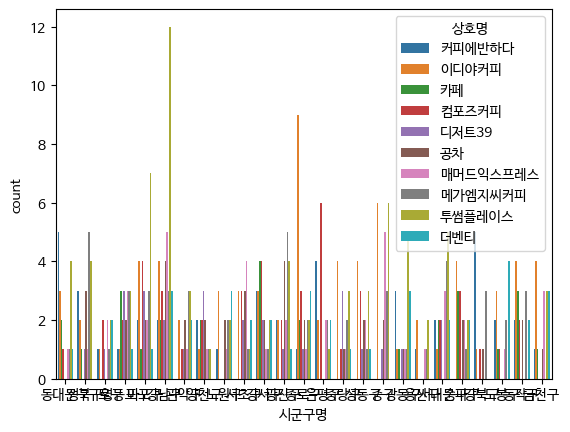

In [125]:
sns.countplot(data=seoul_cafe_10,x='시군구명', hue='상호명')

In [137]:
temp = seoul_cafe_10.groupby(['시군구명','상호명'])['상호명'].count().unstack()
temp.iloc[0]

상호명
공차           4.0
더벤티          3.0
디저트39        2.0
매머드익스프레스     5.0
메가엠지씨커피      3.0
이디야커피        4.0
카페           2.0
커피에반하다       2.0
컴포즈커피        3.0
투썸플레이스      12.0
Name: 강남구, dtype: float64

In [ ]:
sns.barplot(data = temp.iloc[0])

In [141]:
temp.index, len(temp.index)

(Index(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
        '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
        '용산구', '은평구', '종로구', '중구', '중랑구'],
       dtype='object', name='시군구명'),
 25)

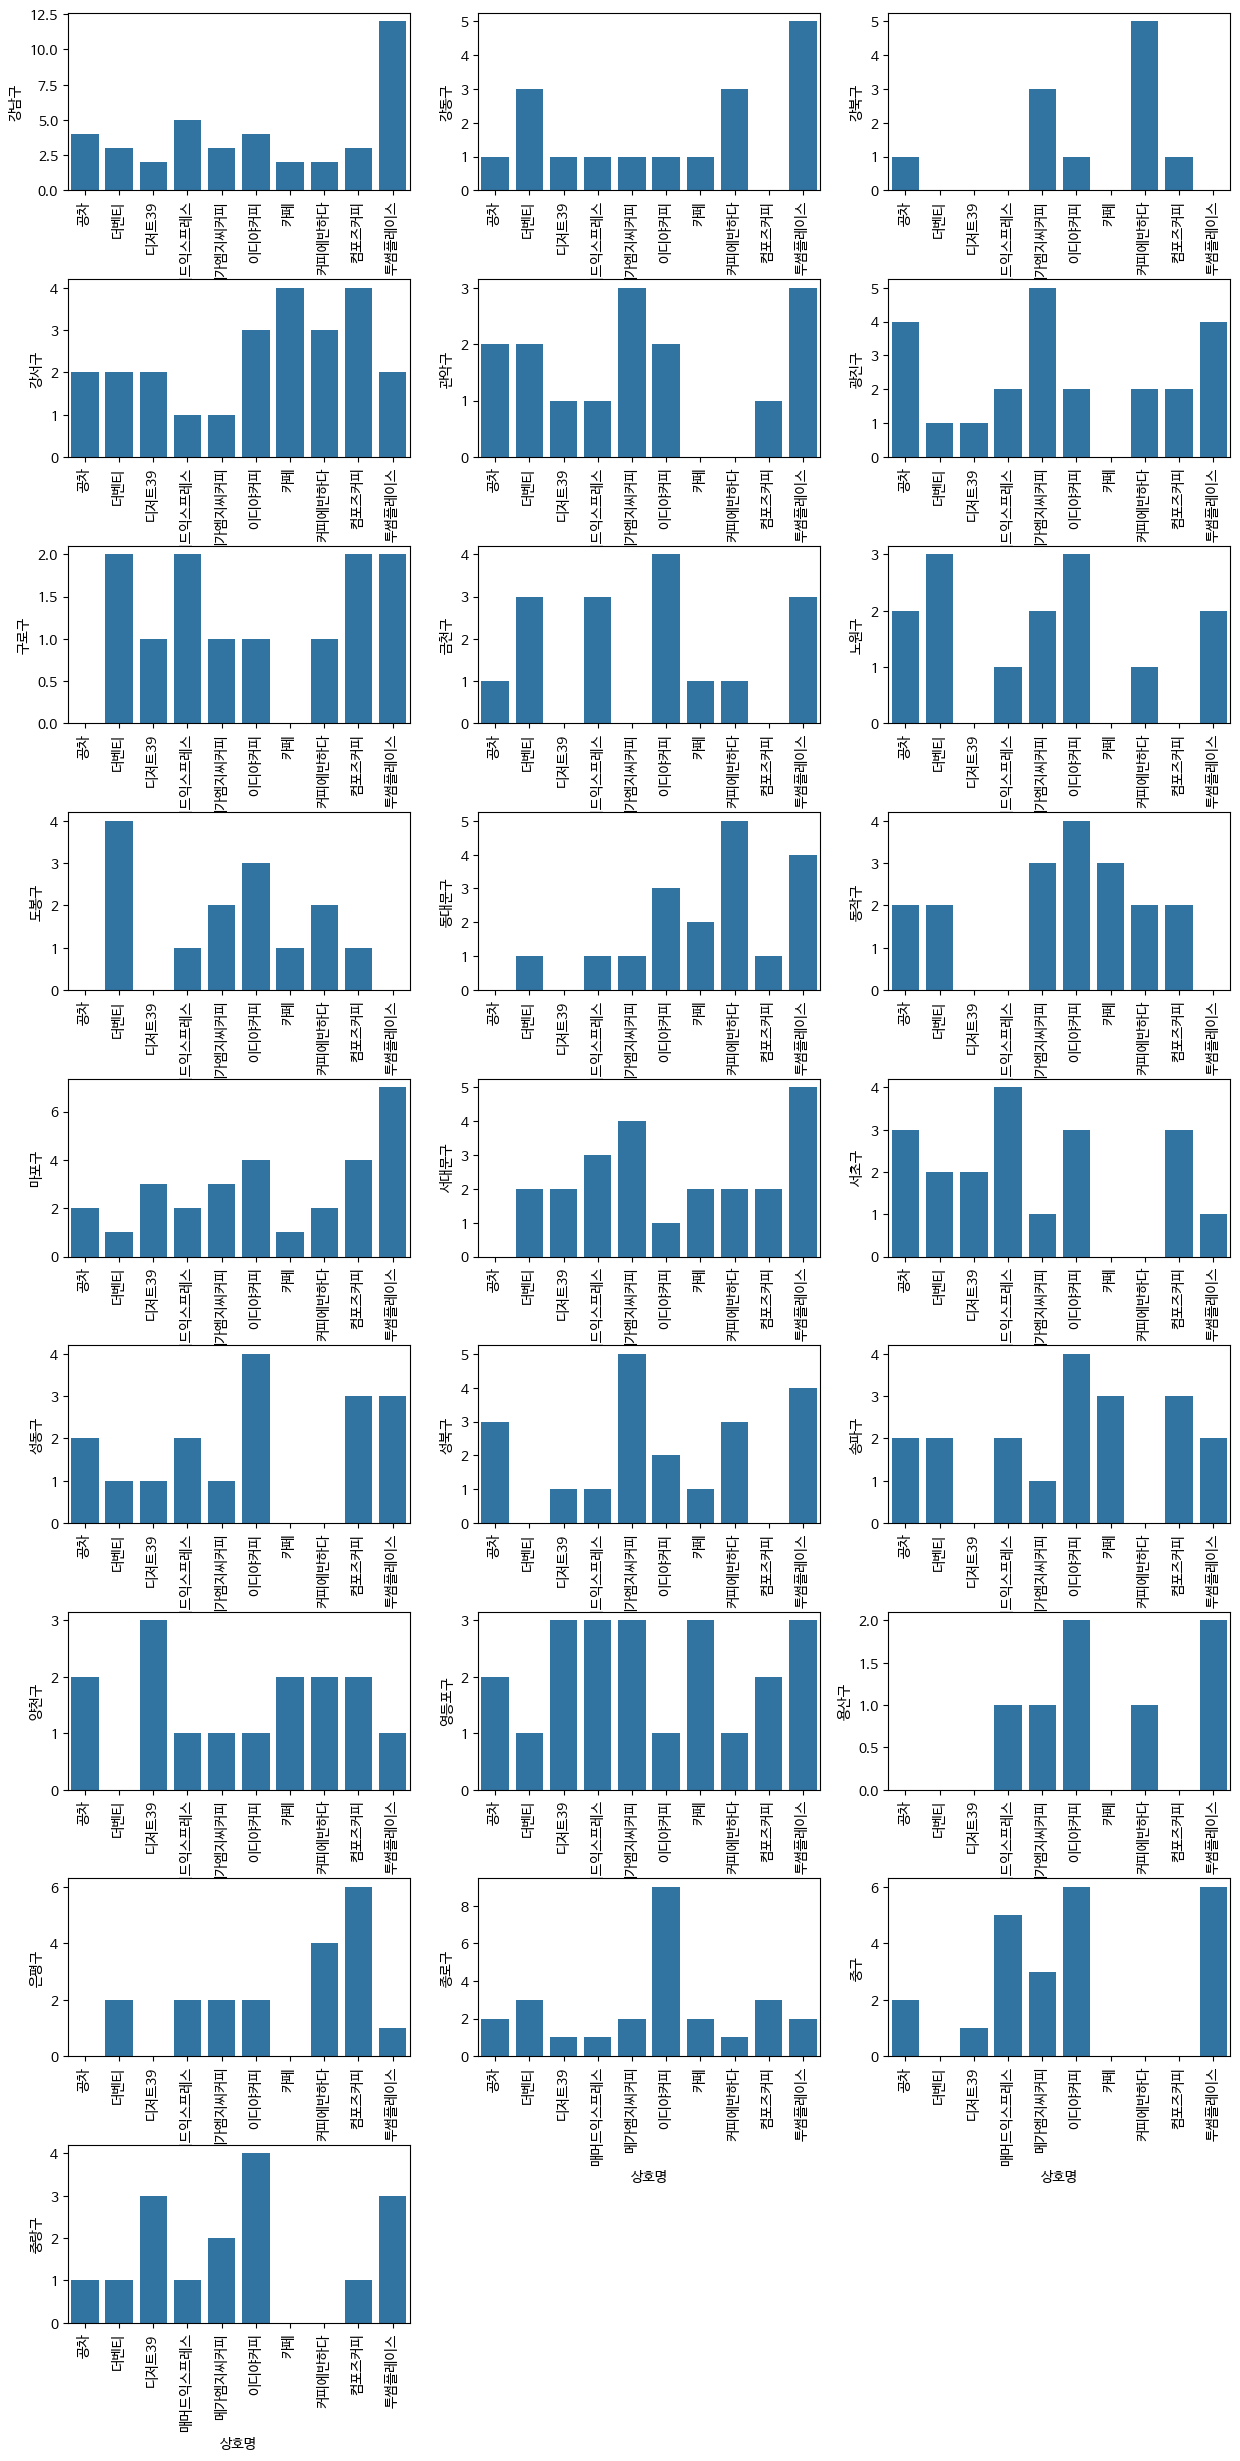

In [153]:
plt.figure(figsize=(15,30))
plt.subplots_adjust(hspace=0.5)
for i in range(25):
  plt.subplot(9,3,i+1)
  sns.barplot(data = temp.iloc[i])
  plt.xticks(rotation=90)

plt.show()